# "제목!!"
> "요약!!"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Sehwan
- categories: [jupyter, Machine Learning]

#**데이터 전처리 기법**


---



1.   데이터 실수화(Data Vectorization)
2.   데이터 정제(Data Cleaning)
3.   데이터 통합(Data Integration)
4.   데이터 축소(Data Reduction)
5.   데이터 변환(Data Transformation)
6.   데이터 불균형(Data Imbalance)



##**1. 데이터 실수화(Data Vectorization)**
---

* **범주형 자료의 실수화(Categorial data Vectorization)**


1.   Skikit-learn의 DictVectorizer 함수
2.   CSR 표현식 (Compressed Sparse Row)  

* **텍스트 자료의 실수화(Text data Vectorization)**

1.   단어의 출현 횟수를 이용한 데이터 실수화
2.   TF-IDF 기법

### **범주형 자료의 실수화(Categorial data Vectorization)**

In [ ]:
# Sckikit-learn의 DictVectorizer 함수

x = [{'city':'seoul', 'temp':10.0},{'city':'Dubai', 'temp':33.5},{'city':'LA', 'temp':20.0}]
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False) 
vec.fit_transform(x) # vec.fit_transform(x) 자체가 하나의 type을 가진다 print(type(vec.fit_transform(x)))

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [ ]:
# CSR 표현식 (Compressed Sparse Row)
# 희소행렬의 메모리 낭비를 해결하기 위한 방법

vec1 = DictVectorizer(sparse=True) # 메모리를 줄이기 위해 sparse=True -> 압축되어 있는 형태
x1 = vec1.fit_transform(x)
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

### **텍스트 자료의 실수화(Text data Vectorization)**

In [ ]:
# 단어의 출현 횟수를 이용한 데이터 실수화

text = {'떴다 떴다 비행기 날아라 날아라',
        '높이 높이 날아라 우리 비행기',
        '내가 만든 비행기 날아라 날아라',
        '멀리 멀리 날아라 우리 비행기'}
text

{'내가 만든 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '떴다 떴다 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기'}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer() # default는 sparse=True
t = vec2.fit_transform(text).toarray() # sparse=True를 풀고 text를 수량화 배열 자료로 변환, toarray() -> CSR 표현의 압축을 풀기 위해 사용
import pandas as pd
t1 = pd.DataFrame(t,columns=vec2.get_feature_names())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,1,0,0,0,0,2,1,1
1,2,1,0,0,1,0,1,0
2,1,0,2,0,0,0,1,1
3,2,0,0,2,0,0,1,0


In [ ]:
# TF-IDF
# 1. 가중치 재계산  2. 높은 빈도에 낮은 가중치, 낮은 빈도에 높은 가중치

from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
x2 = tfid.fit_transform(text).toarray() # 높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
x3 = pd.DataFrame(x2,columns=tfid.get_feature_names())
x3 

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
2,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869
3,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869


##**2. 데이터 정제(Data Cleaning)**
---

*   **결측 데이터 채우기(Empty Values)**


1.   결측 데이터: np.nan, npNAN, None
2.   평균(mean), 중위수(median), 최빈수(most frequent value)로 대처하는 기법
3.   사용가능함수 -> sklearn의 Imputer()






### **결측 데이터 채우기(Empty Values)**

In [ ]:
import numpy as np
x_miss = np.array([[1,2,3,None],[5,np.NAN,7,8],[None,10,11,12],[13,np.NAN,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [ ]:
# 열의 평균값으로 대체

from sklearn.impute import SimpleImputer
im1 = SimpleImputer(strategy='mean')
im1.fit_transform(x_miss) # 열의 평균값으로 대체 
im2 = SimpleImputer(strategy='median')
im2.fit_transform(x_miss) # 열의 중간값으로 대체 
im3 = SimpleImputer(strategy='most_frequent')
im3.fit_transform(x_miss) # 열의 최빈값으로 대체 

array([[ 1.,  2.,  3., 12.],
       [ 5.,  6.,  7.,  8.],
       [ 5., 10., 11., 12.],
       [13.,  6., 15., 16.]])

##**3. 데이터 통합(Data Integration)**

---


*   **데이터 통합**

1.   Pandas의 merge()함수 사용
2.   Pandas의 df.dtypes -> 변수의 자료 타입 확인





### **데이터 통합**

In [ ]:
#Pandas의 merge() 함수 사용
#df1

import pandas as pd
df1 = pd.read_csv("train.csv", engine='python')
print(df1.shape)
type(df1)
df1.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#df2

df2 = pd.read_csv("store.csv", engine='python')
print(df2.shape)
type(df2)
df2.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df = pd.merge(df1,df2,on='Store')
print(df.shape)
df.head()

(1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Pandas의 df.dtypes 함수 사용

df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
print(len(df['Store'].unique()))
print(len(df['Date'].unique())) # unique -> 독립적인 개수
print(df['DayOfWeek'].value_counts()) # value_counts() -> 해당 value의 개수

1115
942
1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64


##**5. 데이터 변환(Data Transformation)**

---


*   **데이터 변환 법**


1.   표준화(Standardization)
2.   정규화(Normalization)






### **데이터 변환 법**

In [ ]:
# 표준화(Standardization)

x = (x - mean(x)) / sd(x) # sd(x) -> 표준편차

# 정규화(Normalization)

x = (x - min(x)) / (max(x) - min(x))

# 정규화가 표준화보다 유용하다. 단, 데이터 특성이 bell-shape이거나 이상치(noise가 큼, empty data가 많음)가 있을 경우에는 표준화가 유용하다.

NameError: ignored

##**6. 데이터 불균형(Data Imbalance)**

*   **과소표집(undersampling)**

*   **과대표집(oversampling)**

1.   SMOTE(Synthetic minority oversampling technique)
2.   ADASYN(adaptive synthetic sampling method)





In [ ]:
# 불균형 데이터 생성

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

# n_feature 변경, n_informative와 n_redundant 추가
x, y = make_classification(n_classes=3, weights=[0.03,0.07,0.9], n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=10)

print('Original dataset shape %s ' %Counter(y) )

Original dataset shape Counter({2: 180, 1: 14, 0: 6}) 


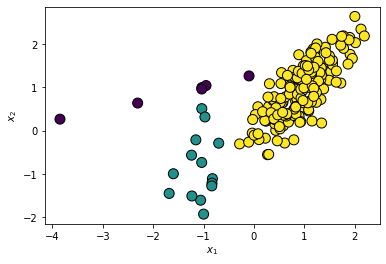

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], marker = 'o', c=y, s=100, edgecolor = "k", linewidth=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### **과대표집(oversampling)**

In [ ]:
# SMOTE

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x,y)
print('Resampled  dataset shape %s' % Counter(y_res))

Resampled  dataset shape Counter({2: 180, 1: 180, 0: 180})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


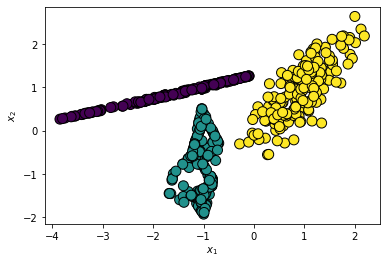

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_res[:,0], x_res[:,1], marker='o', c=y_res, s=100, edgecolor="k", linewidth=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
# ADASYN

ada = ADASYN(random_state=0)
x_syn, y_syn = ada.fit_resample(x,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))


Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


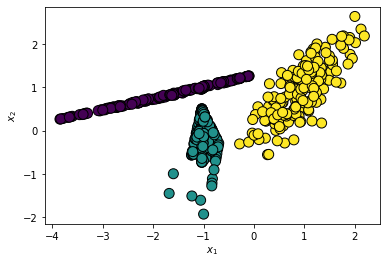

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_syn[:,0], x_syn[:,1], marker='o', c=y_syn, s=100, edgecolor="k", linewidth=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### **과소표집(undersampling)**

In [ ]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
x_under, y_under = undersample.fit_resample(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

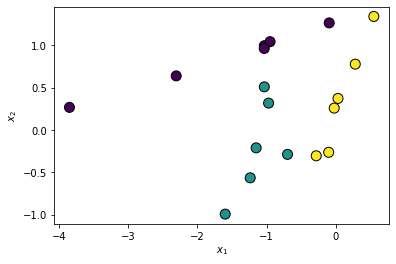

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_under[:,0], x_under[:,1], marker='o', c=y_under, s=100, edgecolor="k", linewidth=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()